In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Duomenų rinkinių nuskaitymas

In [2]:
publikacijos = pd.read_csv('publikacijos.csv')

In [3]:
publikacijos = publikacijos.iloc[: , 1:]

In [4]:
publikacijos['pub_year'] = publikacijos['pub_year'].replace([3010], 2010)

In [5]:
mokslo_sritis = publikacijos['res_fields_1'].str.split(' ', expand=True)

In [6]:
publikacijos['science_field'] = mokslo_sritis[0]

In [7]:
bendros_sritys = pd.read_excel('science_field_name.xlsx')

In [8]:
visos_sritys = pd.read_excel('res_field_name.xlsx')

In [9]:
dokumentai = pd.read_excel('doc_code.xlsx')

In [10]:
autoriu_skaicius = pd.read_excel('author_number.xlsx')

In [11]:
publikacijos = pd.merge(publikacijos, 
                      bendros_sritys, 
                      on ='science_field', 
                      how ='inner')

In [12]:
publikacijos = pd.merge(publikacijos, 
                      visos_sritys, 
                      on ='res_fields_1', 
                      how ='inner')

In [13]:
publikacijos = pd.merge(publikacijos, 
                      dokumentai, 
                      on ='doc_code', 
                      how ='inner')

In [14]:
publikacijos = pd.merge(publikacijos, 
                      autoriu_skaicius, 
                      on ='docs_id', 
                      how ='inner')

In [15]:
publikacijos.tail(5)

,docs_id,doc_code,pub_year,doi,pages,publication,journal_name,volume_in_pages,dbases_count,Scopus,...,other_dbases,res_fields_1,res_fields_2,res_fields_3,final_index,science_field,science_field_name,res_field_name,doc_code_name,author_number
6950,20278799,S8,2016,0,5-8,. Toward the culture of hope: editorial.,Lituanus: the Lithuanian quartely,3,2,0,...,2,H 003,NaN,NaN,333.0,H,Humanitariniai mokslai,Menotyra,"Straipsnis (apžvalginis, informacinis, enciklo...",1
6951,24894788,S8,2017,1,0,"(aut., įv.) . Pratarmė.",Masinės statybos gyvenamųjų rajonų architektūr...,0,0,0,...,0,H 003,NaN,NaN,1008.0,H,Humanitariniai mokslai,Menotyra,"Straipsnis (apžvalginis, informacinis, enciklo...",1
6952,24894996,S8,2017,1,0,"(aut., įv.) . Pratarmė.",Architektūros kokybės užtikrinimo priemonės: m...,0,0,0,...,0,H 003,NaN,NaN,541.0,H,Humanitariniai mokslai,Menotyra,"Straipsnis (apžvalginis, informacinis, enciklo...",1
6953,40206635,S8,2019,0,5-12,. Urbanistinės ir architektūrinės kaitos moks...,Projektavimo modeliai ir gyvenamoji architektūra,7,0,0,...,0,H 003,NaN,NaN,1131.0,H,Humanitariniai mokslai,Menotyra,"Straipsnis (apžvalginis, informacinis, enciklo...",1
6954,3944183,S8,2010,0,0,"(aut., įv.) . Įžangos žodis.",Dabar arba niekados: Tomo Noraus-Naruševičiaus...,0,0,0,...,0,H 005,NaN,NaN,638.0,H,Humanitariniai mokslai,Istorija ir archeologija,"Straipsnis (apžvalginis, informacinis, enciklo...",1


### Missing values apskaičiavimas

In [16]:
data = pd.read_excel('data1.xlsx')

In [17]:
data_raw = pd.read_csv('data.csv')

In [18]:
row_count = data_raw.shape[0]

In [19]:
missing_values = round((data_raw.isnull().sum() / row_count),2).to_frame()

In [20]:
missing_values = missing_values.to_string(formatters={
    0: '{:,.2%}'.format
})
print(missing_values)

                    0
docs_id         0.00%
doc_code        0.00%
projection_apa  0.00%
res_fields      0.00%
dbases         21.00%
if_info        63.00%
scopus_info    53.00%
pub_year        0.00%


### Bibliometrinė analizė

#### Publikacijų skaičius 2010 – 2019 periode

In [21]:
metai = pd.DataFrame(publikacijos.groupby(['pub_year'])['pub_year'].count())

In [22]:
metai = metai.drop(metai.tail(1).index,
                   inplace=False).drop(metai.head(1).index,
                                       inplace=False).rename(columns = {'pub_year' : 'Count'}, 
                                                             inplace = False).reset_index()

#### Vidutinis publikacijų skaičius

In [23]:
metai['Count'].mean()

695.3

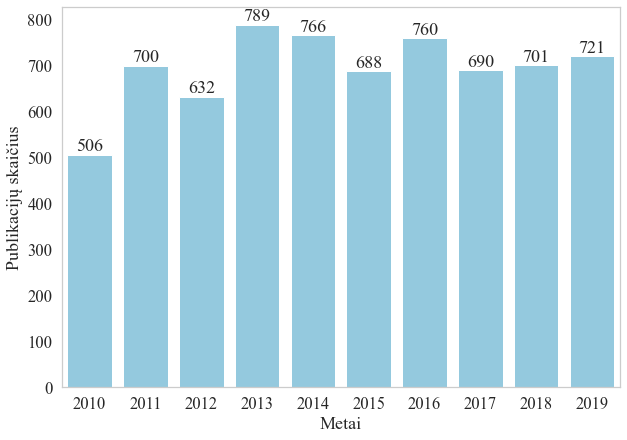

In [24]:
sns.set_theme(style="whitegrid", font_scale=1.5, font="Times New Roman")
rs = np.random.RandomState(8)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10,7))
ax.grid(False)

x = metai['pub_year']
y = metai['Count']
sns.barplot(x=x, y=y, ax=ax, color='skyblue')
plt.ylabel('Publikacijų skaičius')
plt.xlabel('Metai')
for i in ax.containers:
    ax.bar_label(i)

#### Mokslo ir meno sričių klasifikatoriai

In [25]:
sritys = pd.DataFrame(publikacijos.groupby(['science_field_name'])['science_field_name'].count()).rename(columns = {'science_field_name' : 'Count'}, 
                                                             inplace = False).reset_index().sort_values(by = 'Count', ascending=False)

In [26]:
sritys

,science_field_name,Count
4,Technologijos mokslai,3825
3,Socialiniai mokslai,1735
1,Humanitariniai mokslai,756
0,Gamtos mokslai,564
2,Medicinos ir sveikatos mokslai,69
5,Vaizduojamieji menai,3
6,Žemės ūkio mokslai,3


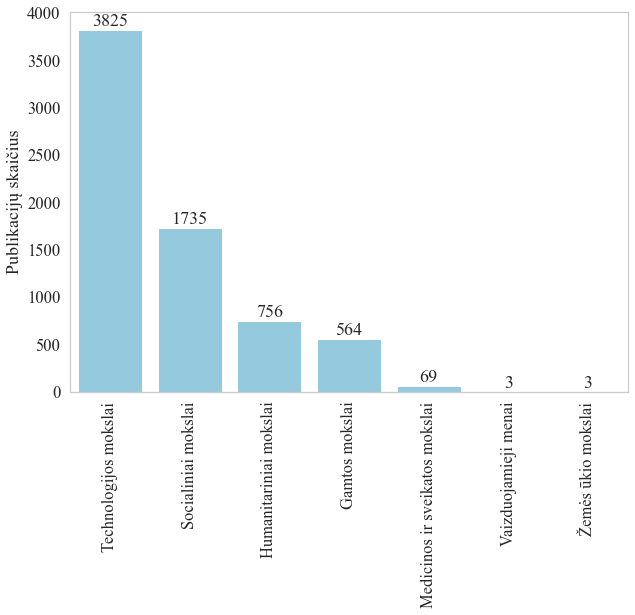

In [27]:
sns.set_theme(style="whitegrid", font_scale=1.5, font="Times New Roman")
rs = np.random.RandomState(8)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10,7))
ax.grid(False)

x = sritys['science_field_name']
y = sritys['Count']
sns.barplot(x=x, y=y, ax=ax, color='skyblue')
plt.xticks(rotation=90)
plt.ylabel('Publikacijų skaičius')
plt.xlabel("")
for i in ax.containers:
    ax.bar_label(i)

#### Tik T (Technologijos mokslai) mokslo sritis

In [28]:
T = publikacijos[publikacijos['science_field'] == 'T']

In [29]:
T_sritys = pd.DataFrame(T.groupby(['res_field_name'])['res_field_name'].count()).rename(columns = {'res_field_name' : 'Count'}, 
                                                             inplace = False).reset_index().sort_values(by = 'Count', ascending=False)

In [30]:
T_sritys['%'] = ((T_sritys['Count'] / T_sritys['Count'].sum())*100).round(2).astype(str) + '%'

In [31]:
T_sritys

,res_field_name,Count,%
8,Statybos inžinerija,1066,27.87%
9,Transporto inžinerija,508,13.28%
2,Elektros ir elektronikos inžinerija,431,11.27%
6,Mechanikos inžinerija,429,11.22%
0,Aplinkos inžinerija,391,10.22%
4,Informatikos inžinerija,352,9.2%
7,Medžiagų inžinerija,325,8.5%
5,Matavimų inžinerija,177,4.63%
3,Energetika ir termoinžinerija,95,2.48%
1,Chemijos inžinerija,51,1.33%


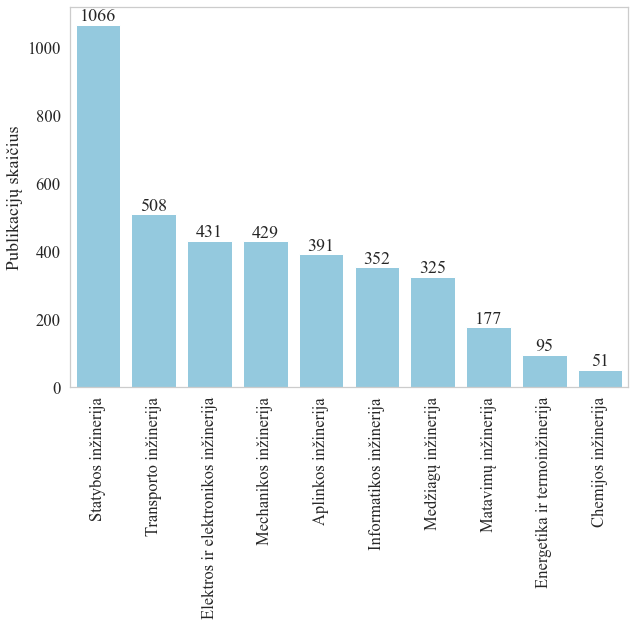

In [32]:
sns.set_theme(style="whitegrid", font_scale=1.5, font="Times New Roman")
rs = np.random.RandomState(8)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10,7))
ax.grid(False)

x = T_sritys['res_field_name']
y = T_sritys['Count']
sns.barplot(x=x, y=y, ax=ax, color='skyblue')
plt.xticks(rotation=90)
plt.ylabel('Publikacijų skaičius')
plt.xlabel("")
for i in ax.containers:
    ax.bar_label(i)

In [33]:
T_sritys_2 = T[['pub_year', 'res_field_name']]

In [34]:
T_sritys_2

,pub_year,res_field_name
610,2010,Aplinkos inžinerija
611,2010,Aplinkos inžinerija
612,2010,Aplinkos inžinerija
613,2010,Aplinkos inžinerija
614,2010,Aplinkos inžinerija
...,...,...
6919,2017,Transporto inžinerija
6920,2018,Transporto inžinerija
6921,2018,Transporto inžinerija
6922,2019,Transporto inžinerija


In [35]:
T_sritys_2['count'] = 1

C:\Users\Ruta\AppData\Local\Temp\ipykernel_11628\3701569036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T_sritys_2['count'] = 1


In [36]:
T_sritys_3 = T_sritys_2.groupby(['pub_year', 'res_field_name'], as_index=False).count()

#### Statybos inžinerijos srities pokytis nagrinėjamu periodu

In [37]:
pirminis = T_sritys_3[(T_sritys_3['pub_year'] == 2010) & (T_sritys_3['res_field_name'] == 'Statybos inžinerija') ]

In [38]:
galutinis = T_sritys_3[(T_sritys_3['pub_year'] == 2019) & (T_sritys_3['res_field_name'] == 'Statybos inžinerija') ]

In [39]:
pokytis = (((galutinis['count'].values[0].astype(int) - pirminis['count'].values[0].astype(int)) / pirminis['count'].values[0].astype(int))*100).round(2).astype(str) + '%'

In [40]:
pokytis

'72.06%'

#### Technologijos mokslų sričių pokytis per 2010 – 2019 metus

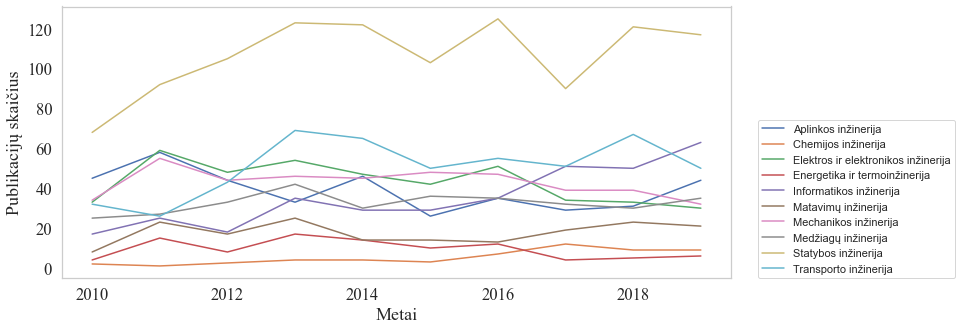

In [41]:
f, ax = plt.subplots(figsize=(12, 5))
ax.grid(False)
sns.set_theme(style="whitegrid", font_scale=1.5, font="Times New Roman")
sns.set_theme(style="white")
sns.lineplot(x="pub_year", y="count",
             hue="res_field_name",
             data=T_sritys_3)
plt.ylabel('Publikacijų skaičius')
plt.xlabel('Metai')
plt.legend(loc=(1.04,0));

#### Dokumentu tipai

In [42]:
dokumentu_tipai = publikacijos[['pub_year', 'doc_code_name']]

In [43]:
dokumentu_tipai['count'] = 1

C:\Users\Ruta\AppData\Local\Temp\ipykernel_11628\3935742210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dokumentu_tipai['count'] = 1


In [44]:
dokumentu_tipai = dokumentu_tipai.groupby(['pub_year', 'doc_code_name'], as_index=False).count()

In [45]:
dokumentu_tipai = dokumentu_tipai[(dokumentu_tipai['pub_year'] > 2009) & (dokumentu_tipai['pub_year'] < 2020)]

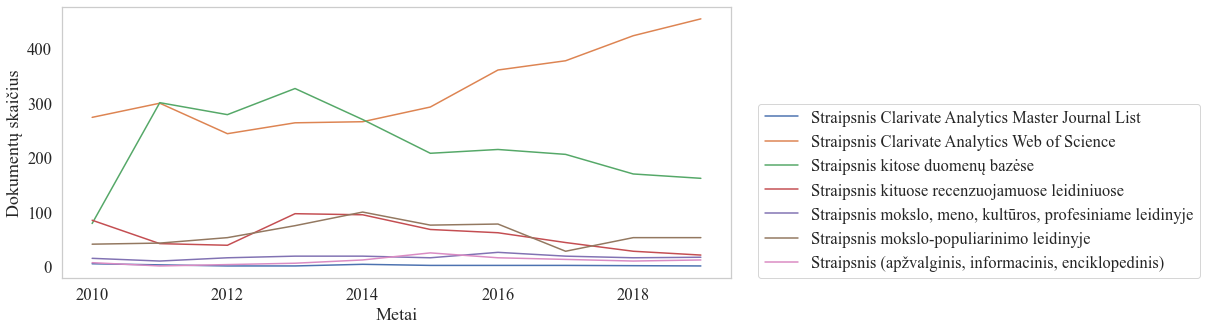

In [46]:
sns.set_theme(style="whitegrid", font_scale=1.5, font="Times New Roman")
f, ax = plt.subplots(figsize=(12, 5))
ax.grid(False)
sns.lineplot(x="pub_year", y="count",
             hue="doc_code_name",
             data=dokumentu_tipai)
plt.ylabel('Dokumentų skaičius')
plt.xlabel('Metai')
plt.legend(loc=(1.04,0));

#### Straipsnis Clarivate Analytics Web of Science pokytis

In [47]:
pirminis = dokumentu_tipai[(dokumentu_tipai['pub_year'] == 2010) & (dokumentu_tipai['doc_code_name'] == 'Straipsnis Clarivate Analytics Web of Science') ]

In [48]:
galutinis = dokumentu_tipai[(dokumentu_tipai['pub_year'] == 2019) & (dokumentu_tipai['doc_code_name'] == 'Straipsnis Clarivate Analytics Web of Science') ]

In [49]:
pokytis = (((galutinis['count'].values[0].astype(int) - pirminis['count'].values[0].astype(int)) / pirminis['count'].values[0].astype(int))*100).round(2).astype(str) + '%'

In [50]:
pokytis

'66.06%'

#### Autorių analizė

In [51]:
authors = pd.read_csv('authors.csv')

In [52]:
pavardes = pd.read_excel('autoriu_pavardes.xlsx')

#### Autorių indeksai perkeliami i viena stulpelį ir apskaičiuojama, kiek kartų kiekvienas iš jų pasikartojo duomenų rinkinyje

In [53]:
authors_count = pd.concat([authors[col] for col in authors.columns]).to_frame().rename(columns = {0 : 'index'}, 
                                                             inplace = False)

In [54]:
visi = authors_count.groupby('index').size().to_frame().sort_values(by=0, ascending=False).rename(columns = {0 : 'Count'}, 
                                                             inplace = False)

In [55]:
visi.shape[0]

5556

#### Išrenkami 10 produktyviausių autorių

In [56]:
visi_vardai = pd.merge(visi, pavardes, how='left' ,left_on='index', right_on='index')

In [57]:
visi_vardai.head(10)

,index,Count,authors
0,5431.0,386,"Zavadskas, E. K."
1,4931.0,114,"Turskis, Z."
2,1845.0,110,"Jučiūtė, E."
3,3510.0,108,"Peleckis, K."
4,163.0,108,"Antuchevičienė, J."
5,303.0,99,"Baltrėnas, P."
6,2915.0,92,"Matijošius, J."
7,4118.0,91,"Samalavičius, A. L."
8,4938.0,90,"Tvaronavičienė, M."
9,2980.0,89,"Melnikas, B."


#### Bendraautorystės analizė

In [58]:
authors['bendraautoriai'] = authors.count(axis = 1)

##### Vidutinis bendraautorių skaičius

In [59]:
authors['bendraautoriai'].mean().round(2)

2.84

In [60]:
bendraautoriai = authors['bendraautoriai'].value_counts().to_frame()

In [61]:
bendraautoriai

,bendraautoriai
2,2152
1,1920
3,1410
4,926
5,540
6,268
7,123
8,63
9,36
10,25


#### Duomenų bazių analizė

In [62]:
dbases = data[['pub_year', 'dbases_count', 
               'Scopus','SCIE',
               'ICONDA','IndexCopernicus',
               'INSPEC','Academic_Search_Complete',
               'DOAJ','SSCI',
               'VINITI','Business_Source_Complete',
               'other_dbases']]

In [63]:
dbases_2 = dbases.groupby(['pub_year'], as_index=False).sum()

In [64]:
dbases_2 = dbases_2.drop(dbases_2.head(1).index,inplace=False).drop(dbases_2.tail(2).index,inplace=False).set_index('pub_year')

In [65]:
dbases_3 = dbases_2.drop(['dbases_count', 'other_dbases'], axis=1)

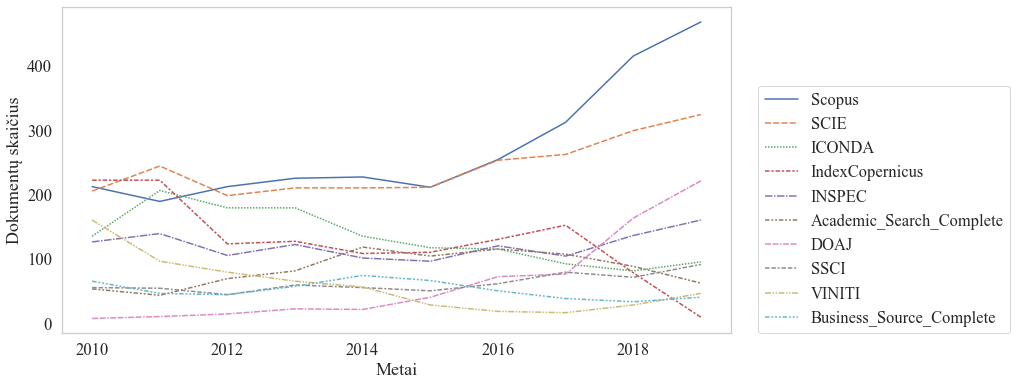

In [66]:
sns.set_theme(style="whitegrid", font_scale=1.5, font="Times New Roman")

fig, ax = plt.subplots(figsize=(12,6))
ax.grid(False)
sns.lineplot(data=dbases_3)

plt.ylabel('Dokumentų skaičius')
plt.xlabel('Metai')
plt.legend(loc=(1.04,0));


#### Pagrindinių duomenuų bazių publikacijų skaičiaus pokytis

In [67]:
Scopus = (((dbases_3['Scopus'].iloc[-1] - dbases_3['Scopus'].iloc[0]) / dbases_3['Scopus'].iloc[0])*100).round(2).astype(str) + '%'

In [68]:
Scopus

'120.19%'

In [69]:
SCIE = (((dbases_3['SCIE'].iloc[-1] - dbases_3['SCIE'].iloc[0]) / dbases_3['SCIE'].iloc[0])*100).round(2).astype(str) + '%'

In [70]:
SCIE

'57.77%'

In [71]:
IndexCopernicus = (((dbases_3['IndexCopernicus'].iloc[-1] - dbases_3['IndexCopernicus'].iloc[0]) / dbases_3['IndexCopernicus'].iloc[0])*100).round(2).astype(str) + '%'

In [72]:
IndexCopernicus

'-95.52%'